# House Price Prediction

In [191]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [192]:
# Data frame
data = pd.read_csv('Data/bengaluru_house_prices.csv')

In [193]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [194]:
data.shape

(13320, 9)

In [195]:
# Data types of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [196]:
# Statistical overview of numeric data
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


## Data Cleaning

***Duplicates***

In [197]:
# Check Duplicates
data.duplicated().sum()

np.int64(529)

In [198]:
# Drop duplicate entries
data.drop_duplicates(inplace=True)

***Missing values***

In [199]:
# Missing values
data.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

In [200]:
# location column
data.dropna(subset=['location'], inplace=True)

In [201]:
# bath column
data['bath'] = data['bath'].fillna(np.floor(data.bath.mean()))

In [202]:
# balcony column
data['balcony'] = data['balcony'].fillna(np.floor(data.balcony.mean()))

In [203]:
# Dropping society column as 50% values in the column are missing
data = data.drop('society', axis='columns')

In [204]:
# Drop NA values
data = data.dropna(subset=['size'])

***Categorical Features***

In [205]:
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


*Area_Type Column*

In [206]:
# Unique categories
data.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [207]:
# Category wise count
data.area_type.value_counts()

area_type
Super built-up  Area    8316
Built-up  Area          2398
Plot  Area              1973
Carpet  Area              87
Name: count, dtype: int64

In [208]:
# Dummy variables for area_type categories
area_types = pd.get_dummies(data.area_type,dtype=int).drop(['Carpet  Area'], axis='columns')
area_types

,Built-up Area,Plot Area,Super built-up Area
0,0,0,1
1,0,1,0
2,1,0,0
3,0,0,1
4,0,0,1
...,...,...,...
13314,0,0,1
13315,1,0,0
13316,0,0,1
13317,1,0,0


In [209]:
# Concating dummies and main data frame
data = pd.concat([data,area_types], axis='columns')
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,Built-up Area,Plot Area,Super built-up Area
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,0,0,1
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,0,1,0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1,0,0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,0,0,1
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,0,0,1


In [210]:
# Dropping area_type column
data = data.drop('area_type', axis='columns')
data.head()

,availability,location,size,total_sqft,bath,balcony,price,Built-up Area,Plot Area,Super built-up Area
0,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,0,0,1
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,0,1,0
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1,0,0
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,0,0,1
4,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,0,0,1


*Availability Column*

In [211]:
# Unique values
data.availability.unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       '19-May', '17-Nov', '20-Oct', '20-Jun', '19-Feb', '21-Oct',
       '21-Jan', '17-Mar', '17-Apr', '22-May', '19-Oct', '21-Jul',
       '21-Nov', '21-Mar', '16-Dec', '22-Mar', '20-Jan', '21-Sep',
       '21-Aug', '14-Nov', '19-Nov', '15-Nov', '16-Jul', '15-Jun',
       '17-Feb', '20-Nov', '20-Jul', '16-Sep', '15-Oct', '15-Dec',
       '16-Oct', '22-Nov', '15-Aug', '17-Jan', '16-Nov', '20-Apr',
       '16-Jan', '14-Jul'], dtype=object)

In [212]:
# Create date column
data['date'] = data.availability.str.split('-').str[0]

In [213]:
data.head()

,availability,location,size,total_sqft,bath,balcony,price,Built-up Area,Plot Area,Super built-up Area,date
0,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,0,0,1,19
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,0,1,0,Ready To Move
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1,0,0,Ready To Move
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,0,0,1,Ready To Move
4,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,0,0,1,Ready To Move


In [214]:
# Create Month column

In [215]:
# Create Month column
data['month'] = data.availability.str.split('-').str[1]

In [216]:
# Encoding 'Ready To Move' & 'Immediate Possession'

data.date = data.date.replace({"Ready To Move" : '01', "Immediate Possession" : '01'})

In [217]:
# NaN values in Month column 
data.month = data.month.fillna('Jan')

In [218]:
# Unique values
data.date.unique()

array(['19', '01', '18', '20', '17', '21', '22', '16', '14', '15'],
      dtype=object)

In [219]:
# Unique Values
data.month.unique()

array(['Dec', 'Jan', 'May', 'Feb', 'Nov', 'Oct', 'Sep', 'Mar', 'Apr',
       'Aug', 'Jun', 'Jul'], dtype=object)

In [220]:
# Mapping values
data.month = data.month.map({'Dec': 12, "Jan" : 1, "May" : 5, "Feb" : 2, "Nov" : 11, "Oct" : 10, 'Sep' : 9, 'Mar' : 3, 'Apr' : 4, 'Aug' : 8, 'Jun' : 6, 'Jul' : 7})

In [221]:
# data type
data.month.dtype

dtype('int64')

In [222]:
# Change data type of Date values to integers
data.date = data.date.astype(int)

# data type
data.date.dtype

dtype('int64')

In [223]:
# Drop availability column
data = data.drop('availability', axis='columns')

In [224]:
data.head()

,location,size,total_sqft,bath,balcony,price,Built-up Area,Plot Area,Super built-up Area,date,month
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,0,0,1,19,12
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,0,1,0,1,1
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1,0,0,1,1
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,0,0,1,1,1
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,0,0,1,1,1


*Size Column*

In [225]:
# Unique values
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [226]:
# BHK count
data['bhk'] = data['size'].str.strip('').str[0]

In [227]:
# Data type
data.bhk.dtype

dtype('O')

In [228]:
# Change Data type
data.bhk = data.bhk.astype(int)

In [229]:
# Drop Size column
data = data.drop('size', axis='columns')

*Total Sqft Column*

In [230]:
# Unique values
data.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2110,), dtype=object)

- The values in total_sqft column are not uniform
- Some instances have absolute values, some have range of values, so are in different units

In [231]:
# Function to filter non absolute values

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

# Filtering data frame

data[~data['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,balcony,price,Built-up Area,Plot Area,Super built-up Area,date,month,bhk
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,0,0,1,19,12,4
56,Devanahalli,3010 - 3410,2.0,1.0,192.000,1,0,0,20,2,4
81,Hennur Road,2957 - 3450,2.0,1.0,224.500,1,0,0,18,10,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,0,0,1,18,3,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,0,0,1,19,3,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,0,0,1,18,12,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,0,0,1,1,1,2
224,Devanahalli,1520 - 1740,2.0,1.0,74.820,0,0,1,19,12,3
410,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,0,0,1,1,1,1
549,Hennur Road,1195 - 1440,2.0,0.0,63.770,0,0,1,18,9,2


In [232]:
# Function to correct erroneous entries

def convert(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None    

In [233]:
#  Correcting erroneous entries
data['total_sqft'] = data['total_sqft'].apply(convert)


In [234]:
data.head()

,location,total_sqft,bath,balcony,price,Built-up Area,Plot Area,Super built-up Area,date,month,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,0,0,1,19,12,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,0,1,0,1,1,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,1,0,0,1,1,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,0,0,1,1,1,3
4,Kothanur,1200.0,2.0,1.0,51.00,0,0,1,1,1,2


## Feature Engineering

*Price Per Sqft*

In [235]:
# Create new feature
data['price_per_sqft'] = round(data['price']*100000/data['total_sqft'], 2) # Multiplying price by 100000 as price given in per lakh INR
data.head()

,location,total_sqft,bath,balcony,price,Built-up Area,Plot Area,Super built-up Area,date,month,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,0,0,1,19,12,2,3699.81
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,0,1,0,1,1,4,4615.38
2,Uttarahalli,1440.0,2.0,3.0,62.00,1,0,0,1,1,3,4305.56
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,0,0,1,1,1,3,6245.89
4,Kothanur,1200.0,2.0,1.0,51.00,0,0,1,1,1,2,4250.00


*Dimensionality Reduction - Location Column*

In [236]:
# Get Unique locations in data set
data.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], shape=(1304,), dtype=object)

In [237]:
# Number of unique location
len(data.location.unique())

1304

In [238]:
# Clean text in location column
data.location = data.location.apply(lambda x: x.strip())

In [239]:
# Number of houses per unique location
location_stats = data.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats.head(25)

location
Whitefield                  523
Sarjapur  Road              377
Electronic City             289
Kanakpura Road              249
Thanisandra                 232
Yelahanka                   209
Marathahalli                169
Hebbal                      161
Raja Rajeshwari Nagar       159
Uttarahalli                 157
Hennur Road                 149
Bannerghatta Road           149
7th Phase JP Nagar          135
Electronic City Phase II    128
Rajaji Nagar                107
Haralur Road                102
Bellandur                    93
KR Puram                     91
Hoodi                        88
Electronics City Phase 1     88
Yeshwanthpur                 83
Sarjapur                     82
Chandapura                   82
Kasavanhalli                 78
Harlur                       77
Name: location, dtype: int64

- Since there are 1304 Unique locations with varied count for houses per location, it is inefficient to consider each unique location as separate feature. This will lead to high dimensionality of the feature set.
- To counter this, we will apply a threshold of 10 houses per location. This means locations with more than 10 houses will be considered as separate unique features, others will be combined into the feature named other.

In [240]:
# Number of unique locations with less or equal to 10 houses
len(location_stats[location_stats<=10])

1060

In [241]:
# Other locations
other = location_stats[location_stats<=10]
other

location
Dairy Circle                 10
Naganathapura                10
Gunjur Palya                 10
Kalkere                      10
Marsur                       10
                             ..
adigondanhalli                1
akshaya nagar t c palya       1
anjananager magdi road        1
arudi                         1
2Electronic City Phase II     1
Name: location, Length: 1060, dtype: int64

In [242]:
# Modify location column to apply threshold
data.location = data.location.apply(lambda x: 'other' if x in other else x)

In [243]:
# New number of unique locations
len(data.location.unique())

234

In [244]:
data.head()

,location,total_sqft,bath,balcony,price,Built-up Area,Plot Area,Super built-up Area,date,month,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,0,0,1,19,12,2,3699.81
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,0,1,0,1,1,4,4615.38
2,Uttarahalli,1440.0,2.0,3.0,62.00,1,0,0,1,1,3,4305.56
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,0,0,1,1,1,3,6245.89
4,Kothanur,1200.0,2.0,1.0,51.00,0,0,1,1,1,2,4250.00


## Outlier Detection & Removal

***Sqft Area***

- Considerations made:
    - Minimum sqft area per room - 300 

In [245]:
# Outliers having less than 300 sqft area per room
data[data.total_sqft/data.bhk < 300]

,location,total_sqft,bath,balcony,price,Built-up Area,Plot Area,Super built-up Area,date,month,bhk,price_per_sqft
9,other,1020.0,6.0,1.0,370.0,0,1,0,1,1,6,36274.51
45,HSR Layout,600.0,9.0,1.0,200.0,0,1,0,1,1,8,33333.33
58,Murugeshpalya,1407.0,4.0,1.0,150.0,0,1,0,1,1,6,10660.98
68,Devarachikkanahalli,1350.0,7.0,0.0,85.0,0,1,0,1,1,8,6296.30
70,other,500.0,3.0,2.0,100.0,0,1,0,1,1,3,20000.00
...,...,...,...,...,...,...,...,...,...,...,...,...
13221,other,1178.0,9.0,1.0,75.0,0,1,0,1,1,9,6366.72
13277,other,1400.0,7.0,1.0,218.0,0,1,0,1,1,7,15571.43
13279,other,1200.0,5.0,1.0,130.0,0,1,0,1,1,6,10833.33
13281,Margondanahalli,1375.0,5.0,1.0,125.0,0,1,0,1,1,5,9090.91


In [246]:
# Shape
data.shape

(12774, 12)

In [247]:
# Dropping outliers
data = data[data.total_sqft/data.bhk >= 300]
data.head()

,location,total_sqft,bath,balcony,price,Built-up Area,Plot Area,Super built-up Area,date,month,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,0,0,1,19,12,2,3699.81
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,0,1,0,1,1,4,4615.38
2,Uttarahalli,1440.0,2.0,3.0,62.00,1,0,0,1,1,3,4305.56
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,0,0,1,1,1,3,6245.89
4,Kothanur,1200.0,2.0,1.0,51.00,0,0,1,1,1,2,4250.00


In [248]:
data.shape

(12010, 12)

***Price per sqft area***

In [249]:
# Statistics 
data.price_per_sqft.describe()


count     12010.000000
mean       6380.225803
std        4245.883222
min         267.830000
25%        4250.000000
50%        5333.330000
75%        6979.107500
max      176470.590000
Name: price_per_sqft, dtype: float64

- As can be seen, the difference between min and max value is too much indicating presence of outliers.
- Considerations made:
    - Data set is having normal distribution
    - Retain instances per location that are between one standard deviation range from mean values.

In [250]:
# Function to filter outliers

def remove_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st =  np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

In [251]:
# Filtered data frame
data = remove_outliers(data)
data.shape

(9899, 12)

***Price BHK Count***

In [252]:
# Function for plotting scatter plot for visualization

def scatter_plot(df, location):
    bhk2 = df[(df.location == location) & (df.bhk==2)]
    bhk3 = df[(df.location == location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    plt.show()

In [253]:
# Create new data frame
data_old = data.copy()

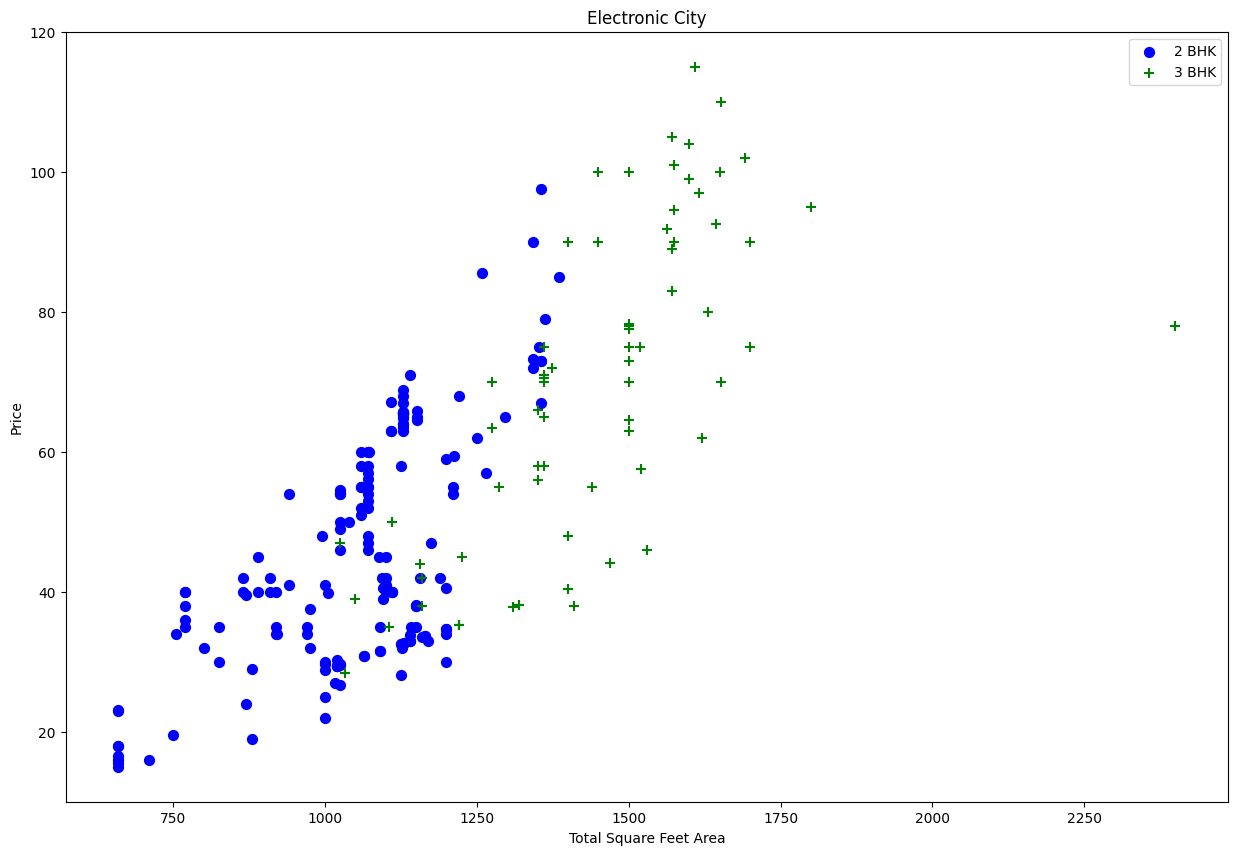

In [254]:
# Electronic City Location
scatter_plot(data_old, 'Electronic City')

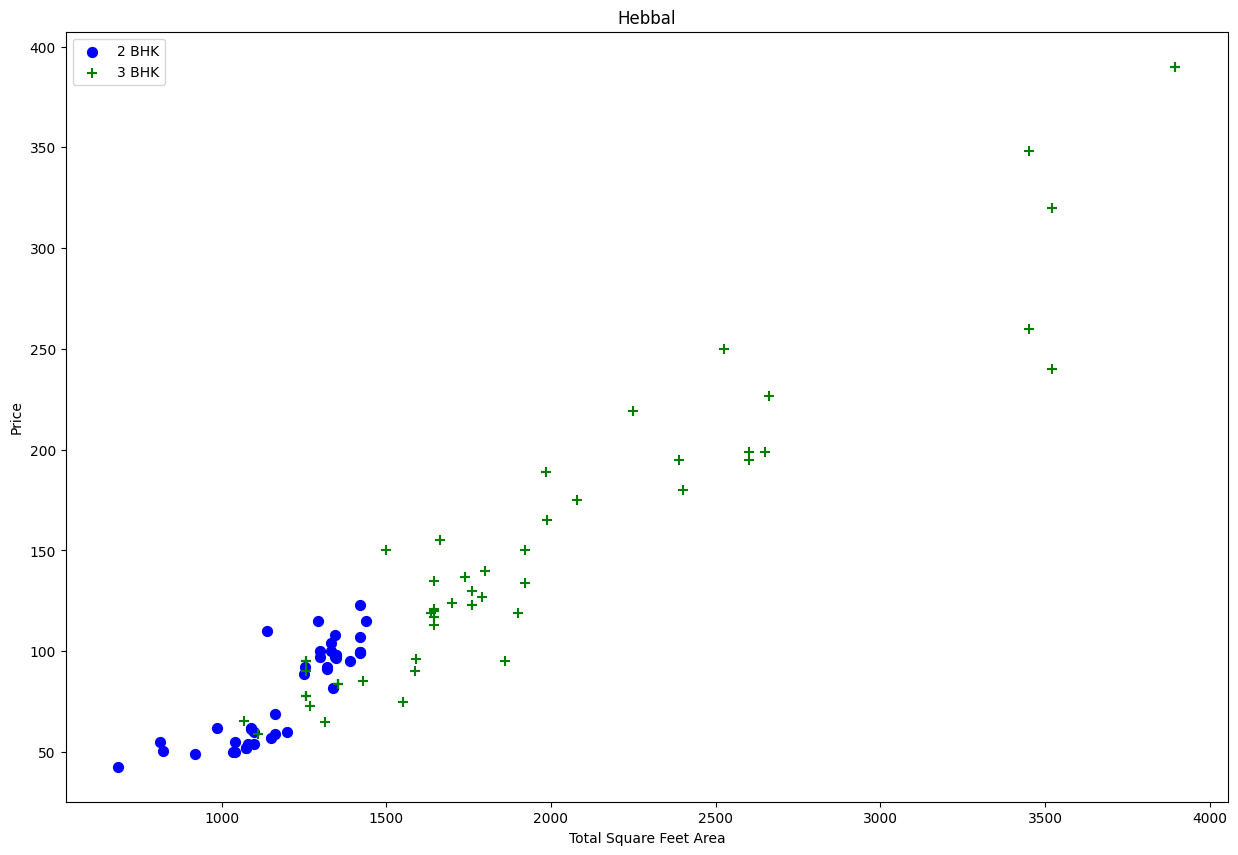

In [255]:
# Hebbal Location
scatter_plot(data_old, 'Hebbal')

- Consideration:
    - 3 BHK apartment should cost more than 2 BHK apartment for same total sqft area
    - 2 BHK apartment should cost more than 1 BHK apartment for same total sqft area 

In [256]:
# Function to remove outliers
def remove_outliers_bhk(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]

            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis = 'index')

In [257]:
# Filtering the data frame
data = remove_outliers_bhk(data)

In [258]:
data.shape

(7023, 12)

*Comparison*

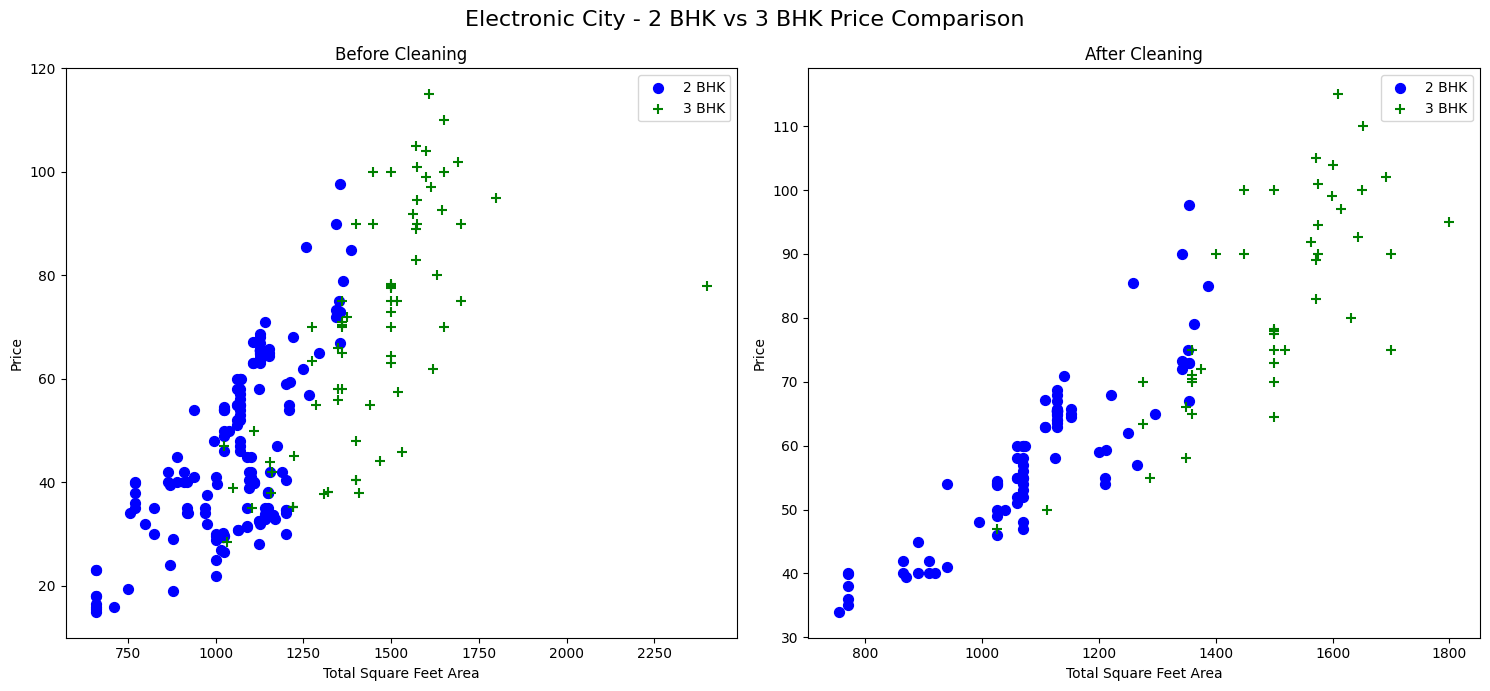

In [259]:
# Comparison : Before and After removing outliers - Electronic City

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,7), tight_layout=True)

bhk2_old = data_old[(data_old.location == 'Electronic City') & (data_old.bhk==2)]
bhk3_old = data_old[(data_old.location == 'Electronic City') & (data_old.bhk==3)]

bhk2 = data[(data.location == 'Electronic City') & (data.bhk==2)]
bhk3 = data[(data.location == 'Electronic City') & (data.bhk==3)]

# First Plot (Before Cleaning)
ax1.scatter(bhk2_old.total_sqft, bhk2_old.price, color='blue', label='2 BHK', s=50)
ax1.scatter(bhk3_old.total_sqft, bhk3_old.price, marker='+', color='green', label='3 BHK', s=50)
ax1.set_title('Before Cleaning')
ax1.set_xlabel('Total Square Feet Area')
ax1.set_ylabel('Price')
ax1.legend()

# Second Plot (After Cleaning)
ax2.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
ax2.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
ax2.set_title('After Cleaning')
ax2.set_xlabel('Total Square Feet Area')
ax2.set_ylabel('Price')
ax2.legend()

plt.suptitle('Electronic City - 2 BHK vs 3 BHK Price Comparison', fontsize=16)
plt.show()

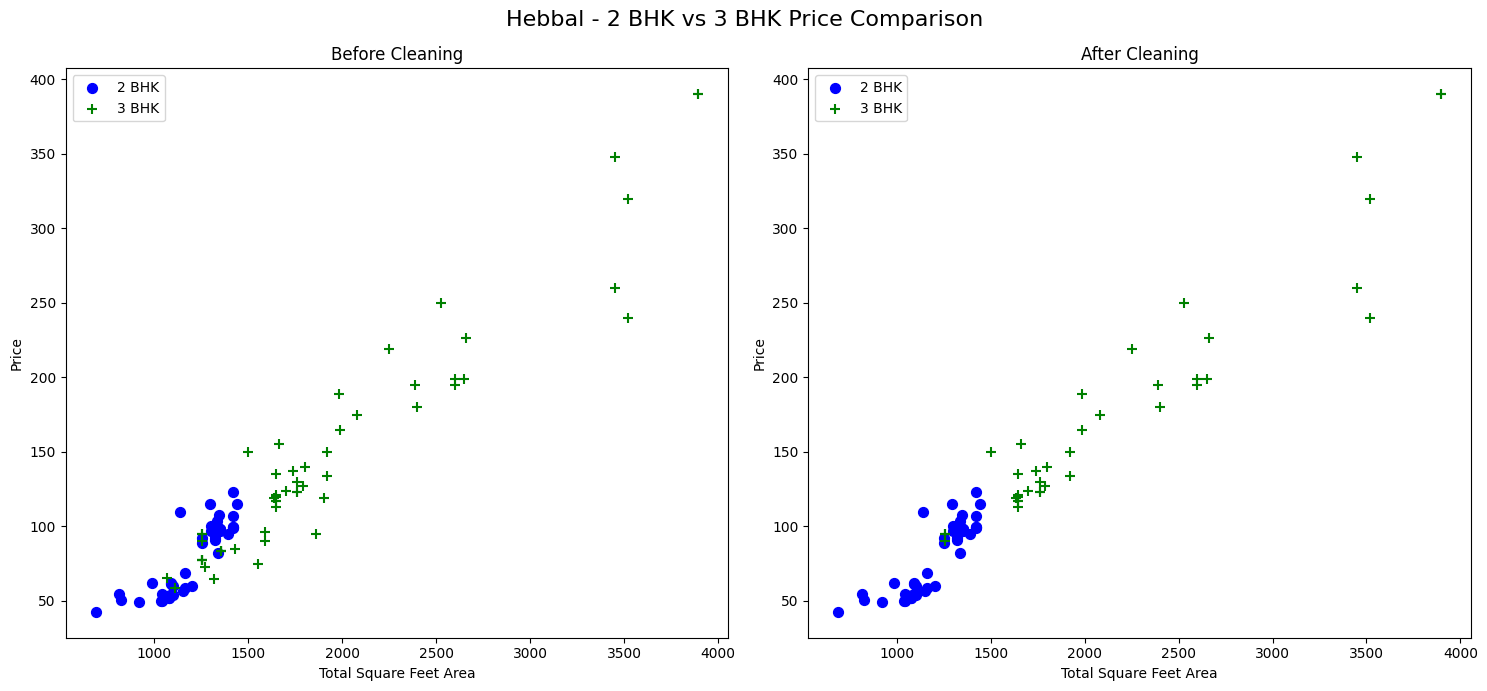

In [260]:
# Comparison : Before and After removing outliers - Hebbal

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,7), tight_layout=True)

bhk2_old = data_old[(data_old.location == 'Hebbal') & (data_old.bhk==2)]
bhk3_old = data_old[(data_old.location == 'Hebbal') & (data_old.bhk==3)]

bhk2 = data[(data.location == 'Hebbal') & (data.bhk==2)]
bhk3 = data[(data.location == 'Hebbal') & (data.bhk==3)]

# First Plot (Before Cleaning)
ax1.scatter(bhk2_old.total_sqft, bhk2_old.price, color='blue', label='2 BHK', s=50)
ax1.scatter(bhk3_old.total_sqft, bhk3_old.price, marker='+', color='green', label='3 BHK', s=50)
ax1.set_title('Before Cleaning')
ax1.set_xlabel('Total Square Feet Area')
ax1.set_ylabel('Price')
ax1.legend()

# Second Plot (After Cleaning)
ax2.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
ax2.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
ax2.set_title('After Cleaning')
ax2.set_xlabel('Total Square Feet Area')
ax2.set_ylabel('Price')
ax2.legend()

plt.suptitle('Hebbal - 2 BHK vs 3 BHK Price Comparison', fontsize=16)
plt.show()

***Numer of Apartments - Price Per Sqft***

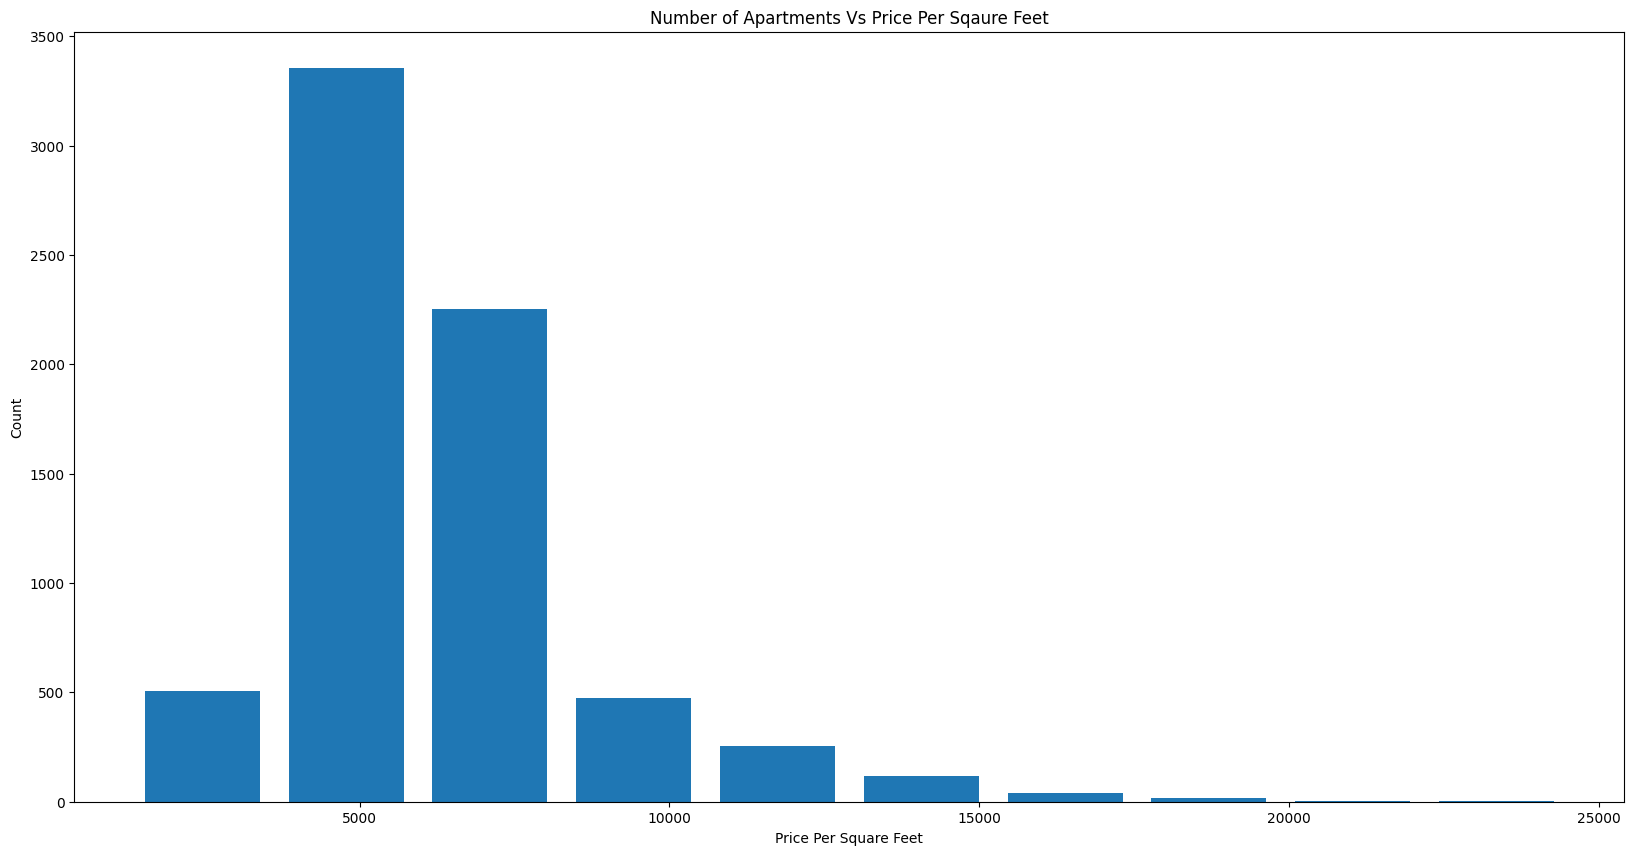

In [261]:
# Plot
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(data.price_per_sqft, rwidth=0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')
plt.title('Number of Apartments Vs Price Per Sqaure Feet')
plt.show()

***Number of Bathrooms***

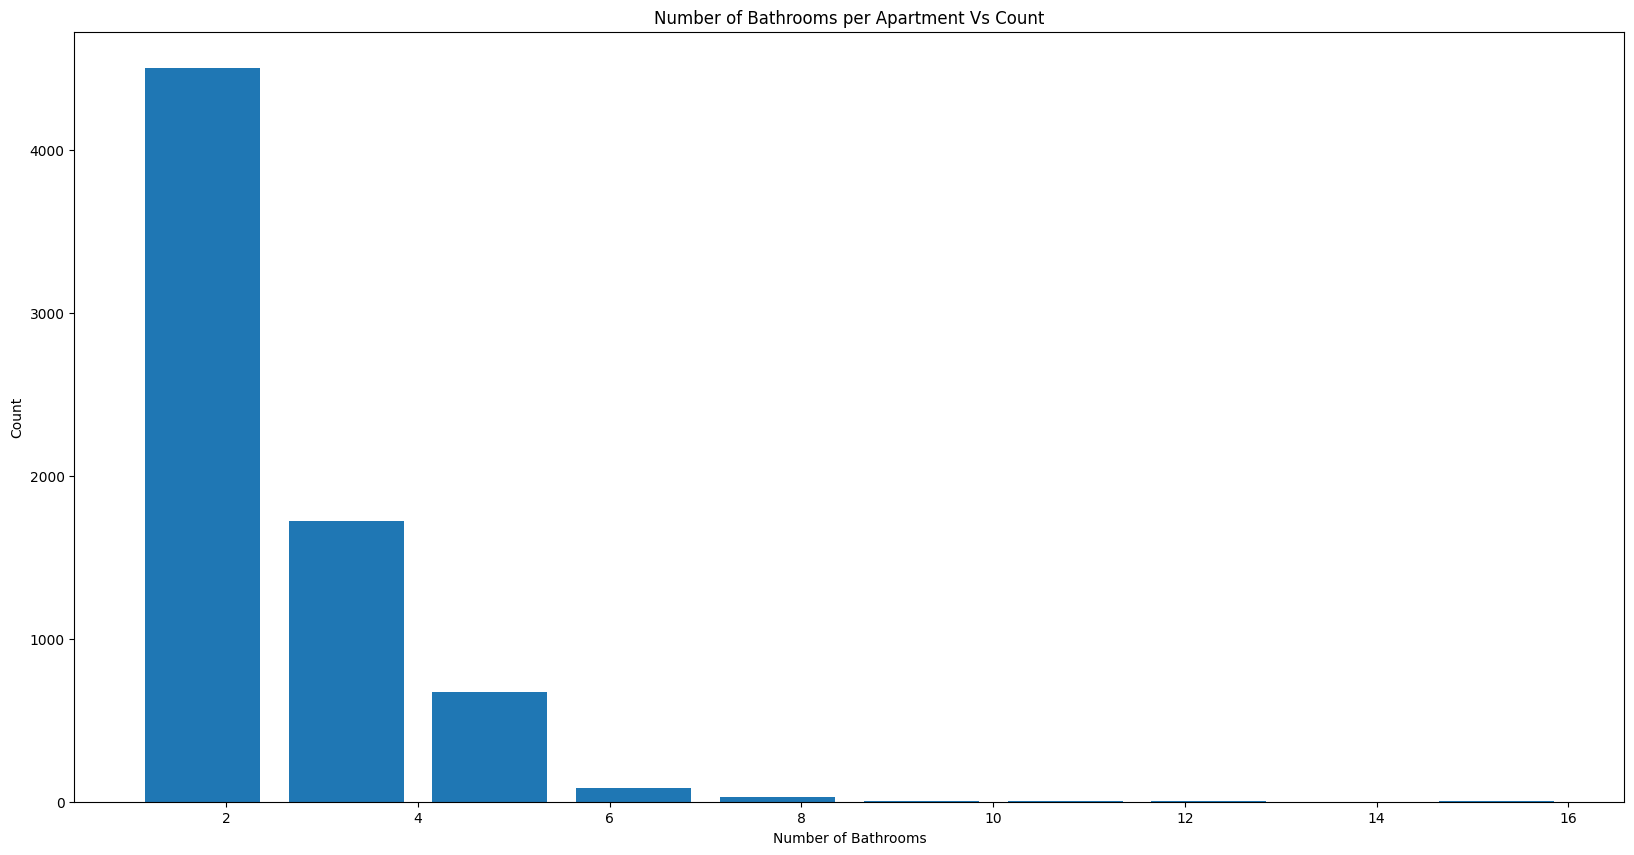

In [262]:
# Plot
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(data.bath, rwidth=0.8)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.title('Number of Bathrooms per Apartment Vs Count')
plt.show()

- Consideration:
    - Number of bathrooms must be equal to or less than number of bedrooms

In [263]:
# Outliers
data[data.bath > data.bhk]

,location,total_sqft,bath,balcony,price,Built-up Area,Plot Area,Super built-up Area,date,month,bhk,price_per_sqft
10,1st Phase JP Nagar,2065.0,4.0,1.0,210.0,0,0,1,1,1,3,10169.49
16,1st Phase JP Nagar,840.0,2.0,2.0,50.0,1,0,0,1,1,1,5952.38
28,2nd Stage Nagarbhavi,3000.0,8.0,3.0,451.0,0,1,0,1,1,6,15033.33
29,2nd Stage Nagarbhavi,2400.0,8.0,3.0,450.0,0,1,0,1,1,6,18750.00
40,5th Phase JP Nagar,1150.0,3.0,3.0,52.5,1,0,0,1,1,2,4565.22
...,...,...,...,...,...,...,...,...,...,...,...,...
9805,other,3100.0,5.0,0.0,425.0,1,0,0,1,1,4,13709.68
9835,other,600.0,3.0,2.0,72.0,0,0,1,1,1,2,12000.00
9862,other,6652.0,6.0,1.0,660.0,0,0,1,1,1,4,9921.83
9869,other,6688.0,6.0,1.0,700.0,0,1,0,1,1,4,10466.51


In [264]:
# Number of Outliers
len(data[data.bath > data.bhk])

473

In [265]:
data.shape

(7023, 12)

In [266]:
# Removing outliers
data = data[data.bath <= data.bhk]

data.shape

(6550, 12)

## Data Transformation

In [267]:
data.head()

,location,total_sqft,bath,balcony,price,Built-up Area,Plot Area,Super built-up Area,date,month,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,0,0,1,20,5,4,15017.54
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,0,0,1,18,6,3,11901.84
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,0,0,1,1,1,3,12533.33
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,1,0,0,15,12,3,10833.33
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,0,0,1,18,6,2,11983.81


In [268]:
data.shape

(6550, 12)

In [269]:
# Drop unnecessary columns
data = data.drop(['price_per_sqft'], axis='columns')

In [270]:
# Dummies for location column
locations = pd.get_dummies(data.location, dtype=int).drop(['other'], axis='columns')
locations

,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9885,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9891,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [271]:
# Concating dummies and main data frame
data = pd.concat([data,locations], axis='columns')
data.head()

,location,total_sqft,bath,balcony,price,Built-up Area,Plot Area,Super built-up Area,date,month,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,0,0,1,20,5,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,0,0,1,18,6,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,1,0,0,15,12,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,0,0,1,18,6,...,0,0,0,0,0,0,0,0,0,0


In [272]:
# Drop location column
data = data.drop(['location'], axis='columns')

data.head()

,total_sqft,bath,balcony,price,Built-up Area,Plot Area,Super built-up Area,date,month,bhk,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,0,0,1,20,5,4,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,0,0,1,18,6,3,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,0,0,1,1,1,3,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,130.0,1,0,0,15,12,3,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.0,0,0,1,18,6,2,...,0,0,0,0,0,0,0,0,0,0


In [273]:
data.columns

Index(['total_sqft', 'bath', 'balcony', 'price', 'Built-up  Area',
       'Plot  Area', 'Super built-up  Area', 'date', 'month', 'bhk',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [274]:
# Independent variable data frame
X = data.drop(['price', 'date', 'month'], axis='columns')
y = data.price

In [275]:
X.head()

,total_sqft,bath,balcony,Built-up Area,Plot Area,Super built-up Area,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,0,0,1,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,0,0,1,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,0,0,1,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,1,0,0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,0,0,1,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [276]:
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [277]:
# Train test split

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training and Evaluation

***Linear Regression Model***

In [278]:
# Model Training
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)

LinearRegression()

In [279]:
# Evaluate Model
lr_clf.score(X_test, y_test)

0.8647535075808738

*K-Fold Cross Validation*

In [280]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
cross_val_score(LinearRegression(), X, y, cv = cv)

array([0.86475351, 0.78190549, 0.85058559, 0.83903479, 0.76898469])

***Best Model Selection***

In [281]:
# Function to define model parameters and calculate scores
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def best_model(X,y):
    algorithms = {
        'linear_regression' :{
            'model' : LinearRegression(),
            'params' : {}},
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1, 2],
                'selection' : ['random', 'cyclic']
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' : ['best', 'random']
            }
        }
    }

    # Calculate scores
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

    for algo_name, config in algorithms.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


In [282]:
# Model scores

best_model(X,y)

,model,best_score,best_params
0,linear_regression,0.821053,{}
1,lasso,0.682250,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.694131,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


- Linear Regression is the best model

In [283]:
X.head()

,total_sqft,bath,balcony,Built-up Area,Plot Area,Super built-up Area,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,0,0,1,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,0,0,1,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,0,0,1,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,1,0,0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,0,0,1,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0


***Prediction***

In [286]:
# Prediction function

def predict(location, sqft, bath, bhk, balcony, area):
    loc_index = np.where(X.columns==location)[0][0]
    area_index = np.where(X.columns==area)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = balcony
    x[6] = bhk

    # Handle location
    if loc_index >= 0:
        x[loc_index] = 1

    # Handle location
    if area_index >= 0:
        x[area_index] = 1
    
    return lr_clf.predict([x])[0]

In [287]:
X.columns

Index(['total_sqft', 'bath', 'balcony', 'Built-up  Area', 'Plot  Area',
       'Super built-up  Area', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Stage Nagarbhavi',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=240)

In [288]:
# prediction

predict('1st Block Jayanagar', 2850, 4,4, 1, 'Super built-up  Area')

np.float64(345.2591218465947)

## Exporting Trained Model

In [ ]:
# Export Pickle file
import pickle

with open('bangalore_home_price_prediction_model.pickle', 'wb') as f:
    pickle.dump(lr_clf,f)

In [291]:
# Export column information for flask server

import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}

with open("columns.json", 'w') as f:
    f.write(json.dumps(columns))